Nama : Alfiana Cendani Putri
email : alfianacndnptr@gmail.com
Kota : Bandung
No telp : 087789247130

In [2]:
#import yang dibutuhkan
import zipfile,os,shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
#Mempersiapkan data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-05 06:17:13--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.08MB/s    in 49s     

2021-05-05 06:18:02 (6.33 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
#Mengecek Versi tensorflow

print (tf.__version__)

2.4.1


In [5]:
#Melakukan extract zip datase

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
#Menggunakan callback

class callbacksaya (tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print ("\nAkurasi Sudah Di Atas 97%")
      self.model.stop_training = True

callbacks = callbacksaya()


In [11]:
base_dir = '/tmp/rockpaperscissors'

#dataset
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

#train&validation
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [12]:
os.mkdir(validation_dir)
os.mkdir(train_dir)

In [13]:
#Train Directory
train_rock = os.path.join(train_dir, 'rock')
train_paper= os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)

#Validation Directory
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'sccissors')
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [14]:
# Split train dan validation dimana ukuran validation set adalah 40% dari total dataset

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [15]:
#Mensalin dataset ke train directory

for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock,file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(train_paper, file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(train_scissors, file))

#Mensalin dataset ke Validation directory
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock, file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(val_paper, file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(val_scissors, file))

In [16]:
# augmentasi dan generate data gambar
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode =  'nearest',  
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode = 'categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [18]:
#Membuat Model Sequential

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()
model.compile(loss= 'categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics =['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

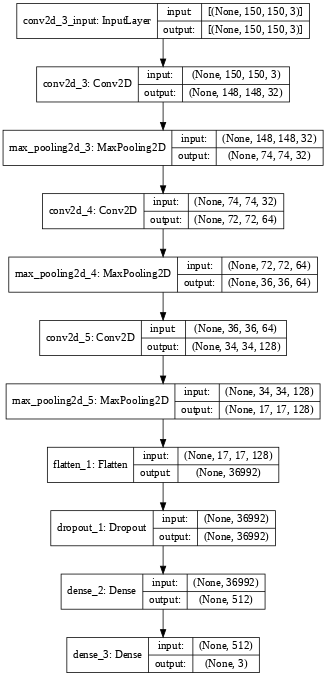

In [20]:
#Visualisasi Model
model_visualisasi = tf.keras.utils.plot_model(model,
                                              to_file='model.png',
                                              show_shapes=True,
                                              show_layer_names=True,
                                              rankdir='TB',
                                              expand_nested=True,
                                              dpi=55)
model_visualisasi

In [21]:
#Step_per_epoch didapatkan dari jumlah training sam
history =model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/20
41/41 - 74s - loss: 1.1265 - accuracy: 0.4855 - val_loss: 0.7550 - val_accuracy: 0.7454
Epoch 2/20
41/41 - 73s - loss: 0.5942 - accuracy: 0.7584 - val_loss: 0.5753 - val_accuracy: 0.7477
Epoch 3/20
41/41 - 72s - loss: 0.3771 - accuracy: 0.8758 - val_loss: 0.2779 - val_accuracy: 0.8981
Epoch 4/20
41/41 - 72s - loss: 0.3084 - accuracy: 0.8887 - val_loss: 0.2893 - val_accuracy: 0.8970
Epoch 5/20
41/41 - 76s - loss: 0.2400 - accuracy: 0.9146 - val_loss: 0.1932 - val_accuracy: 0.9363
Epoch 6/20
41/41 - 72s - loss: 0.2257 - accuracy: 0.9139 - val_loss: 0.1778 - val_accuracy: 0.9444
Epoch 7/20
41/41 - 72s - loss: 0.1796 - accuracy: 0.9383 - val_loss: 0.1922 - val_accuracy: 0.9329
Epoch 8/20
41/41 - 72s - loss: 0.1967 - accuracy: 0.9245 - val_loss: 0.1743 - val_accuracy: 0.9329
Epoch 9/20
41/41 - 72s - loss: 0.1870 - accuracy: 0.9329 - val_loss: 0.1420 - val_accuracy: 0.9502
Epoch 10/20
41/41 - 71s - loss: 0.1722 - accuracy: 0.9474 - val_loss: 0.1376 - val_accuracy: 0.9525
Epoch 11/

Text(0.5, 1.0, 'Loss Plot Training&Validation')

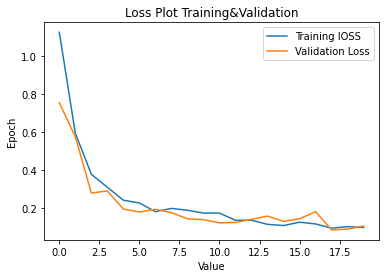

In [22]:
# Membuat Loss Plot Training&Validation

plt.plot(history.history['loss'], label ='Training lOSS' )
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.ylabel('Epoch')
plt.xlabel('Value')
plt.legend(loc='upper right')
plt.title('Loss Plot Training&Validation')

Text(0.5, 1.0, 'Accuracy Plot Training&Validation')

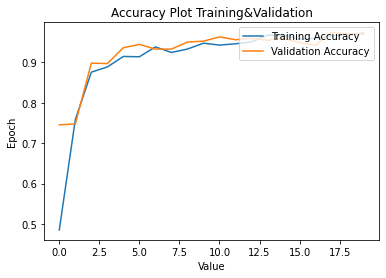

In [23]:
# Membuat Accuracy Plot Training&Validation

plt.plot(history.history['accuracy'],label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Epoch')
plt.xlabel('Value')
plt.legend(loc='upper right')
plt.title('Accuracy Plot Training&Validation')

Saving 6TC3PefZj9PxEdqz.png to 6TC3PefZj9PxEdqz.png
6TC3PefZj9PxEdqz.png
Wow Rock


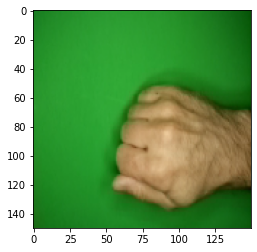

In [25]:
# program inti

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes[0,0]!=0:
    print ('Wow Paper')
  elif classes[0,1]!=0:
    print ('Wow Rock')
  else:
    print ('Wow Scissors')